In [283]:
'''
CS6140 Assignment 4
Jul 14 2022
Wing Man, Kwok
'''

'\nCS6140 Assignment 4\nJul 14 2022\nWing Man, Kwok\n'

In [284]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from random import uniform                       #for the command "uniform"
from math import sqrt, log, exp, pi

In [285]:
#Q1.1  Use a single Gaussion to estimate and create a plot
#Model univariate Gaussian

class Gaussian:

  def __init__(self, mu, sigma):

      self.mu = mu
      self.sigma = sigma
  
  def pdf(self, datum):   #create probability density function

      gassian_exp = (datum - self.mu) / abs(self.sigma)    #Probability of a data point given the current parameters
      y = (1 / (sqrt(2 * pi) * abs(self.sigma))) * exp(- gassian_exp * gassian_exp / 2)

      return y

In [286]:
#Q1.2 Use a 2 Gaussian mixture model to estimate and create a plot
#Model mixture of two univariate Gaussians and their EM estimation

class GaussianMixture_self:
  
  def __init__(self, data, mu_min, mu_max, sigma_min=1, sigma_max=1, mix=.5):
    self.data = data
    self.guassian_model_1 = Gaussian(uniform(mu_min, mu_max), uniform(sigma_min, sigma_max))   #generate 2 gaussian distribution with fed x, sigma, mu
    self.guassian_model_2 = Gaussian(uniform(mu_min, mu_max), uniform(sigma_min, sigma_max))
    self.mix = mix                                                                      #generate how much to overlap 2 gaussians
    
  def Estep(self):            #Perform an E(stimation)-step, assign each point to gaussian 1 or 2 with a percentage

    self.loglikelihood = 0

    for data_point in self.data:

      guassian_distribution_1 = self.guassian_model_1.pdf(data_point) 
      guassian_distribution_2 = self.guassian_model_2.pdf(data_point)

      numerator_1 = guassian_distribution_1 * self.mix  
      numerator_2 = guassian_distribution_2  * (1 - self.mix)  

      posterior_1 = guassian_distribution_1 * self.mix / (numerator_1 + numerator_2)
      posterior_2 = guassian_distribution_1 * self.mix / (numerator_1 + numerator_2)

      self.loglikelihood += log(posterior_1 + posterior_2)

      yield (numerator_1, numerator_2)

  def Mstep(self, weights):   #Perform an M(aximization)-step"

    (Posteriors_1, Posteriors_2) = zip(*weights) 

    self.guassian_model_1.mu = sum(Posteriors_1 * data) / sum(Posteriors_1)
    self.guassian_model_2.mu = sum(Posteriors_2 * data) / sum(Posteriors_2)

    print("sum(Posteriors_sum_1 * data) / sum(Posteriors_1)", sum(Posteriors_1 * data) / sum(Posteriors_1))
    print("sum(w * d for (w, d) in zip(Posteriors_1, data) / sum(Posteriors_1)", sum(w * d for (w, d) in zip(Posteriors_1, data)) / sum(Posteriors_1))

    self.guassian_model_1.sigma = sqrt(sum(Posteriors_1 * (( data - self.guassian_model_1.mu) ** 2) / sum(Posteriors_1)))
    self.guassian_model_2.sigma = sqrt(sum(Posteriors_2 * (( data - self.guassian_model_2.mu) ** 2) / sum(Posteriors_2)))

    n = len(data)
    self.mix = sum(Posteriors_1) / n

  def iterate(self, N=1, verbose=False):    #Perform N iterations, then compute log-likelihood"
     
    for i in range(1, N+1):
      self.Mstep(self.Estep())
    
    self.Estep()

  def pdf(self, x):
    pass

  def __str__(self):
    return 'Mixture: {0}, {1}, mix={2:.03})'.format(self.guassian_model_1, self.guassian_model_2, self.mix)


Mu: 4.449795287015505 Sigma: 4.750714449353187
sum(Posteriors_sum_1 * data) / sum(Posteriors_1) -1.7031570471856605
sum(w * d for (w, d) in zip(Posteriors_1, data) / sum(Posteriors_1) -1.7031570471856605
sum(Posteriors_sum_1 * data) / sum(Posteriors_1) -1.5149054561345248
sum(w * d for (w, d) in zip(Posteriors_1, data) / sum(Posteriors_1) -1.5149054561345248
sum(Posteriors_sum_1 * data) / sum(Posteriors_1) -1.3427463589883717
sum(w * d for (w, d) in zip(Posteriors_1, data) / sum(Posteriors_1) -1.3427463589883717
sum(Posteriors_sum_1 * data) / sum(Posteriors_1) -1.182890349605889
sum(w * d for (w, d) in zip(Posteriors_1, data) / sum(Posteriors_1) -1.182890349605889
sum(Posteriors_sum_1 * data) / sum(Posteriors_1) -1.0325773164573204
sum(w * d for (w, d) in zip(Posteriors_1, data) / sum(Posteriors_1) -1.0325773164573204
sum(Posteriors_sum_1 * data) / sum(Posteriors_1) -0.8896716885363627
sum(w * d for (w, d) in zip(Posteriors_1, data) / sum(Posteriors_1) -0.8896716885363627
sum(Posterior

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


sum(Posteriors_sum_1 * data) / sum(Posteriors_1) -0.6200564279062212
sum(w * d for (w, d) in zip(Posteriors_1, data) / sum(Posteriors_1) -0.6200564279062212
sum(Posteriors_sum_1 * data) / sum(Posteriors_1) -0.49161717532507987
sum(w * d for (w, d) in zip(Posteriors_1, data) / sum(Posteriors_1) -0.49161717532507987
sum(Posteriors_sum_1 * data) / sum(Posteriors_1) -0.3671074018584164
sum(w * d for (w, d) in zip(Posteriors_1, data) / sum(Posteriors_1) -0.3671074018584164


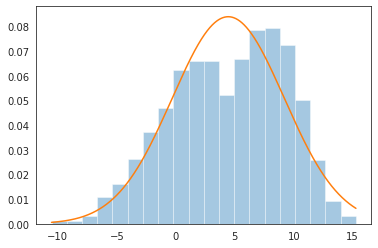

In [287]:
random_seed=36788765
np.random.seed(random_seed)

Mean1 = 2.0  # Input parameter, mean of first normal probability distribution
Standard_dev1 = 4.0 #@param {type:"number"}
Mean2 = 9.0 # Input parameter, mean of second normal  probability distribution
Standard_dev2 = 2.0 #@param {type:"number"}

# generate data
y1 = np.random.normal(Mean1, Standard_dev1, 1000)
y2 = np.random.normal(Mean2, Standard_dev2, 500)
data=np.append(y1,y2)

x = np.linspace(min(data), max(data), 2000)  

#Fit datapoint into Gaussian
fit_gaussian = Gaussian(np.mean(data), np.std(data))
print("Mu:", fit_gaussian.mu, "Sigma:", fit_gaussian.sigma)
single_gaussian = stats.norm(fit_gaussian.mu, fit_gaussian.sigma).pdf(x)

#Plot probability distribution 
sns.set_style("white")
sns.distplot(data, bins=20, kde=False, norm_hist=True)
plt.plot(x, single_gaussian, label='single gaussian')

n_iterations = 10
mix = GaussianMixture_self(data, mu_min=min(data), mu_max = max(data))

for _ in range (n_iterations):
  try:
    mix.iterate(verbose = True)
  except (ZeroDivisionError, ValueError, RuntimeWarning):
    print("one less")
    pass

